In [14]:
import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets

The following Model Project is based on the classic Solow model as we know it from Macroeconomics. First, we will model the Solow model in its simplest form. Next we will build on this simple Solow model by adding Total Factor Productivity (TFP).

1) Our model is defined by the framework below. Note that TFP is not part of the model yet and that we are assuming that we are in a small closed economy:

A small closed economy can be described by following equations:
\\[ Y_t = BK_t^\alpha L_t^{1-\alpha},\alpha\in(0,1) \\]

\\[ S_{t+1} = sY_t, s\in(0,1) \\]

\\[ L_{t+1} = (1+n)L_t, n>-1 \\]


where $Y_t = F(K_t,L_t)$ is GDP; $K_t$ is capital; $L_t$ is labor (growing with a constant rate of $n$); $S_t$ is total savings; s is the savings rate and $k_t = K_t/L_t$. Note also that $B$, alpha, $s$ and $n$ are exogenous parameters.

The transition equation, which shows how capital is accumulated, then becomes

\\[ k_{t+1} = \frac{1}{1+n}(sBk_t^{\alpha}+(1-\delta)k_t), 0<\delta =<1\\]

where, in addition to above defined parameters, $\delta$ is depreciation of capital.

**Steady state** for $k_t$ and $y_t$ is derived below

Steady state of k is


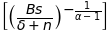

In [15]:
#Below is run to get LaTex format
sm.init_printing(use_unicode=True)


# Define varibles
k = sm.symbols('k')
y = sm.symbols('y')
K = sm.symbols('K')
B = sm.symbols('B')
L = sm.symbols('L')
Y = sm.symbols('Y')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s = sm.symbols('s')
n = sm.symbols('n')


# Define transition equation and solve steady state for capital per capital
f=B*k**alpha
transition1=sm.Eq(k,((1)/(1+n)*(s*B*(k**alpha)+(1-delta)*k)))
steadystate_k1=sm.solve(transition1,k)
print('Steady state of k is')
steadystate_k1


Steady state for y is


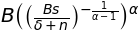

In [16]:
y=B*k**alpha
print('Steady state for y is')
steadystate_y1=y.subs({'k':steadystate_k1[0]})
steadystate_y1

Above we have found the expression for steady state in capital per capita and income per capita. We test our steady state expressions by plugging in arbitrary values for each parameter in each expression: $B=1.5$, $s=0.20$, $n=2\%$, $\alpha=\frac{1}{3}$ and $\delta=1$.  We use a simple function: solution(x), to retrieve a specific steady state value for each. See below.

We notice that this value seems plausible and proceed by solving for optimal steady states using more sophisticated functions. Again we start by choosing arbitrary parameter values.

In [18]:
s=0.2
n=0.02
delta=1
alpha=1/3
B=10

opt_steadystate_k1= lambda steadystate_k1: steadystate_k1 - ( ((1)/(1+n)*(s*B*(steadystate_k1)**alpha+(1-delta)*steadystate_k1)) )
result1 = optimize.root_scalar(opt_steadystate_k1,bracket=[0.1,10],method='brentq')

print('the steady state for k is', result1.root)


the steady state for k is 2.74564722358436


Given the specified parameter values, steady state of capital per capita is 2.75.

We now wish to investigate how the steady state value of capital per capita changes when the savings rate changes by an arbitrary amount.

In [19]:
n=0.02
delta=1
alpha=1/3
B=10

savings = [0.05,0.1,0.2,0.25,0.4,0.5,0.75,0.9]
for s1 in savings:
    obj_kss = lambda steadystate_k1: steadystate_k1 - ((1)/(1+n)*(s1*B*(steadystate_k1)**alpha+(1-delta)*steadystate_k1))
    result1 = optimize.root_scalar(obj_kss,bracket=[0.1,1000],method='brentq')
    print(f'for savings = {s1:.3f} the steady state for k is',result1.root)    
    

for savings = 0.050 the steady state for k is 0.343205902947649
for savings = 0.100 the steady state for k is 0.9707328852712966
for savings = 0.200 the steady state for k is 2.7456472235841
for savings = 0.250 the steady state for k is 3.8371586463550824
for savings = 0.400 the steady state for k is 7.765863082169994
for savings = 0.500 the steady state for k is 10.853123597305084
for savings = 0.750 the steady state for k is 19.938461196567655
for savings = 0.900 the steady state for k is 26.209787902323733


From above result it is instantly clear that the savings rate, s, has a substantial impact on the capital accumulation in the society. Below is a visualisation of how the parameteres impact the accumulation of capital as well as income.

In order to create this visualisation, our next step is to create an interactive graph plotting the transition curve and the 45 degree line including sliders for each of the parameters in the model. The purpose of this is to see the effect on the steady state point from changing one of more parameters. In order to do so, we first define the range of each slider. Then we set up the interactive figure and finally we set up the appropriate sliders.

In [20]:
# We define below the possible numeric intervals of the parameters
alpha = np.arange(0,1)
s = np.arange(0,1)
k = np.arange(100)
B = np.arange(0,100)
n = np.arange(0,0.2)
delta = np.arange(0,1.1)

def interactive_transition1(B,s,alpha,n,delta,k):

    k0 = ((1)/(1+n)*(s*B*(k**alpha)+(1-delta)*k)) 
    m0 = k
    #plt.plot(m)
    
    fig = plt.figure(dpi=90)
    ax = fig.add_subplot(1,1,1)
    ax.plot(k0, label = 'Capital')
    ax.plot(m0, label = '45 degrees line')
    ax.set_xlim([0,15]) # fixed x range
    ax.set_ylim([0,15]) # fixed y range
    plt.xlabel('k in period t')
    plt.ylabel('k in period t+1')
    plt.title('Transition diagram')
    ax.grid(True)
    ax.legend(loc='upper left')
    
    y0 = B*((1)/(1+n)*(s*B*(k**alpha)+(1-delta)*k))**alpha
    
    
    fig = plt.figure(dpi=90)
    ax = fig.add_subplot(1,1,1)
    ax.plot(y0, label = 'Income per capita')
    ax.set_xlim([0,15]) # fixed x range
    ax.set_ylim([0,100]) # fixed y range
    plt.xlabel('k')
    plt.ylabel('y')
    plt.title('Income per capita')
    ax.grid(True)
    ax.legend(loc='upper left')

widgets.interact(interactive_transition1,
    #k1=widgets.fixed(k1),
    alpha=widgets.FloatSlider(description="$alpha$", min=0, max=1, step=0.005, value=0.33),
    s=widgets.FloatSlider(description="$s$", min=0, max=0.7, step=0.005, value=0.2),
    B=widgets.FloatSlider(description="$B$", min=0, max=50, step=1, value=10),
    n=widgets.FloatSlider(description="$n$", min=0, max=0.2, step=0.01, value=0.02),
    delta=widgets.FloatSlider(description="$delta$", min=0, max=1, step=0.01, value=0.4),
    k=widgets.fixed(k)
);

interactive(children=(FloatSlider(value=10.0, description='$B$', max=50.0, step=1.0), FloatSlider(value=0.2, d…

In the figure we notice that as B, s and alpha increases, so does steady state for capital accumulation. Conversely, when n and delta increase, steady state for capital accumulation decreases.

**2) We now consider the Solow-model with a productive externality per worker where:**

A small closed economy can be described by following equations:
\\[ Y_t = A_tK_t^\alpha L_t^{1-\alpha},\alpha\in(0,1) \\]

\\[ A_t = Bk_t^{\phi(1-\alpha)}, B>0,\phi\in(0,1) \\]

\\[ K_{t+1} = sY_t, s\in(0,1) \\]

\\[ L_{t+1} = (1+n)L_t, n>-1 \\]


where $K_t$ is capital; $L_t$ is labor (growing with a constant rate of $n$); $A_t$ is total factor productivity; $Y_t = F(K_t,A_t,L_t)$ is GDP; $k_t = K_t/L_t$ and s is the savings rate. 

Note that TFP is dependent on capital accumulation and therefore an increase in capital effects income accumulation via 2 channels: (i) directly through an increase in k and (ii) indirectly through an increase in productivity. Hence all increases in capital will have a larger effect on income accumulation in this model compared to the simple Solow model in part 1. 

The transition equation then becomes

\\[ k_{t+1} = (\frac{sB}{1+n})k_t^{\alpha+\phi*(1-\alpha)}\\]

**Steady state** for $k_t$ and $y_t$ is derived below

In [21]:
#Below is run to get LaTex format
sm.init_printing(use_unicode=True)

Steady state of k is


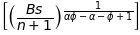

In [22]:
# Define additional variables
# Define varibles
k = sm.symbols('k')
y = sm.symbols('y')
K = sm.symbols('K')
B = sm.symbols('B')
L = sm.symbols('L')
Y = sm.symbols('Y')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s = sm.symbols('s')
n = sm.symbols('n')
A = sm.symbols('A')
phi = sm.symbols('phi')

# Define income equation and transition equation and solve steady state for capital per capita
y=B*k**(alpha + phi*(1-alpha))
transition=sm.Eq(k,((s*B)/(1+n)*k**(alpha+phi*(1-alpha))))
steadystate_k=sm.solve(transition,k)
print('Steady state of k is')
steadystate_k


Steady state for y is


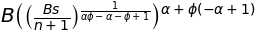

In [23]:
print('Steady state for y is')
steadystate_y=y.subs({'k':steadystate_k[0]})
steadystate_y

Above we have found the expression for steady state in capital per capita and income per capits. We test our steady state expressions by plugging in arbitrary values for each parameter in each expression: $B=10$, $s=0.20$, $n=2\%$, $\alpha=\frac{1}{3}$, $\phi=0.56$.  We use a simple function: solution(x), to retrieve a specific steady state value for each. See below.

We notice that this value seems plausible and proceed by solving for optimal steady states using more sophisticated functions. Again we start by choosing arbitrary parameter values.

In [24]:
print('Inserting the values gives the steadystate value of:')
Solution=sm.lambdify((B,s,n,alpha,phi),steadystate_k)
Solution(10, 0.2, 0.02, 1/3, 0.4)

Inserting the values gives the steadystate value of:


In [25]:
s=0.2
n=0.02
phi=0.4
alpha=1/3
B=10

f = lambda k: A*k**alpha
opt_steadystate_k= lambda steadystate_k: steadystate_k - ( ((s*B)/(1+n))*steadystate_k**(alpha+phi*(1-alpha)) )
result = optimize.root_scalar(opt_steadystate_k,bracket=[0.1,10],method='brentq')

print('the steady state for k is', result.root)


the steady state for k is 5.383622007028104


Given the specified parameter values, steady state of capital per capita is 5.38.

We now wish to investigate how the steady state value of capital per capita changes when the savings rate changes by an arbitrary amount.

In [26]:
n=0.02
phi=0.4
alpha=1/3
B=10
savings_rate = [0.05,0.1,0.2,0.25,0.4,0.5,0.75,0.9]
for s1 in savings_rate:
    f = lambda k: A*k**alpha
    opt_steadystate_k= lambda steadystate_k: steadystate_k - ( ((s1*B)/(1+n))*steadystate_k**(alpha+phi*(1-alpha)) )
    result = optimize.root_scalar(opt_steadystate_k,bracket=[0.1,1000],method='brentq')
    print(f'for s = {s1:.3f} the steady state for k is',result.root)


for s = 0.050 the steady state for k is 0.16823818771955754
for s = 0.100 the steady state for k is 0.951698907128675
for s = 0.200 the steady state for k is 5.383622007028105
for s = 0.250 the steady state for k is 9.40480060381148
for s = 0.400 the steady state for k is 30.4543650281175
for s = 0.500 the steady state for k is 53.20158626129952
for s = 0.750 the steady state for k is 146.60633232770348
for s = 0.900 the steady state for k is 231.2628344322685


Similar to part 1, it is instantly clear that the savings rate, s, has a substantial impact on the capital accumulation in the society. Below is a visualisation of how the parameteres impact the accumulation of capital as well as income.

Our next step is to create an interactive graph plotting the transition curve and the 45 degree line including sliders for each of the parameters in the model. The purpose of this is to see the effect on the steady state point from changing one of more parameters. In order to do so, we first define the range of each slider. Then we set up the interactive figure and finally we set up the appropriate sliders.

In [27]:
alpha = np.arange(0,1)
s = np.arange(0,1)
k = np.arange(100)
B = np.arange(0,100)
n = np.arange(0,0.2)
phi = np.arange(0,1)
y = np.arange(100)

def interactive_transition(B,s,alpha,n,phi,k):


    k1 = ( ((s*B)/(1+n))*k**(alpha+phi*(1-alpha)) )
    m = k
    #plt.plot(m)
    
  
    
    fig = plt.figure(dpi=90)
    ax = fig.add_subplot(1,1,1)
    ax.plot(k1, label = 'Capital')
    ax.plot(m, label = '45 degrees line')
    ax.set_xlim([0,15]) # fixed x range
    ax.set_ylim([0,15]) # fixed y range
    plt.xlabel('k in period t')
    plt.ylabel('k in period t+1')
    plt.title('Transition diagram')
    ax.grid(True)
    ax.legend(loc='upper left')
    
    y1=B*( ((s*B)/(1+n))*k**(alpha+phi*(1-alpha)) )**(alpha + phi*(1-alpha))
    
    fig = plt.figure(dpi=90)
    ax = fig.add_subplot(1,1,1)
    ax.plot(y1, label='Income per capita')
    ax.set_xlim([0,15]) # fixed x range
    ax.set_ylim([0,100]) # fixed y range
    plt.xlabel('k ')
    plt.ylabel('y ')
    plt.title('Income per capita')
    ax.grid(True)
    ax.legend(loc='upper left')

widgets.interact(interactive_transition,
    #k1=widgets.fixed(k1),
    alpha=widgets.FloatSlider(description="$alpha$", min=0, max=1, step=0.005, value=0.33),
    s=widgets.FloatSlider(description="$s$", min=0, max=0.7, step=0.005, value=0.2),
    B=widgets.FloatSlider(description="$B$", min=0, max=50, step=1, value=10),
    n=widgets.FloatSlider(description="$n$", min=0, max=0.2, step=0.01, value=0.02),
    phi=widgets.FloatSlider(description="$phi$", min=0, max=1, step=0.01, value=0.56),
    k=widgets.fixed(k)
);

interactive(children=(FloatSlider(value=10.0, description='$B$', max=50.0, step=1.0), FloatSlider(value=0.2, d…

Similar to part 1, we notice that as B, s, alpha and phi increase, so does steady state for capital accumulation. Conversely, when n increases, steady state for capital accumulation decreases. Importantly we notice that when total factor productivity is dependent on k, all changes in either k or the productivity factor, B, they will have a significantly higher effect on capital accumulation and thereby income. 

We can therefore conclude that an economy with a productive externality per capita will increase capital accumulation.